In [1]:
import cv2
from PIL import Image
from main import generate_output
from border_and_title import *
from template_extraction import *
from utils import *

color = (255, 0, 0)
thickness = 2

# f = "../../data/original/Good/15316-100-D-040_Sheet1.pdf"
# f = "../../data/original/Good/ME-19505.pdf"
# f = "../../data/original/Good/15316-100-D-020_Sheet2.pdf"
# f = "../../data/original/Good/300-014823.pdf"
f = "../../data/original/Ugly/000.895.681.pdf"
data = generate_output(f)
img = data["img"]
mask = data["mask"]
boundary = data["boundary"]
title_blocks = data["title_blocks"]
im_h = data["im_h"]
im_w = data["im_w"]
words = data["words"]
border_lines = data["border_lines"]

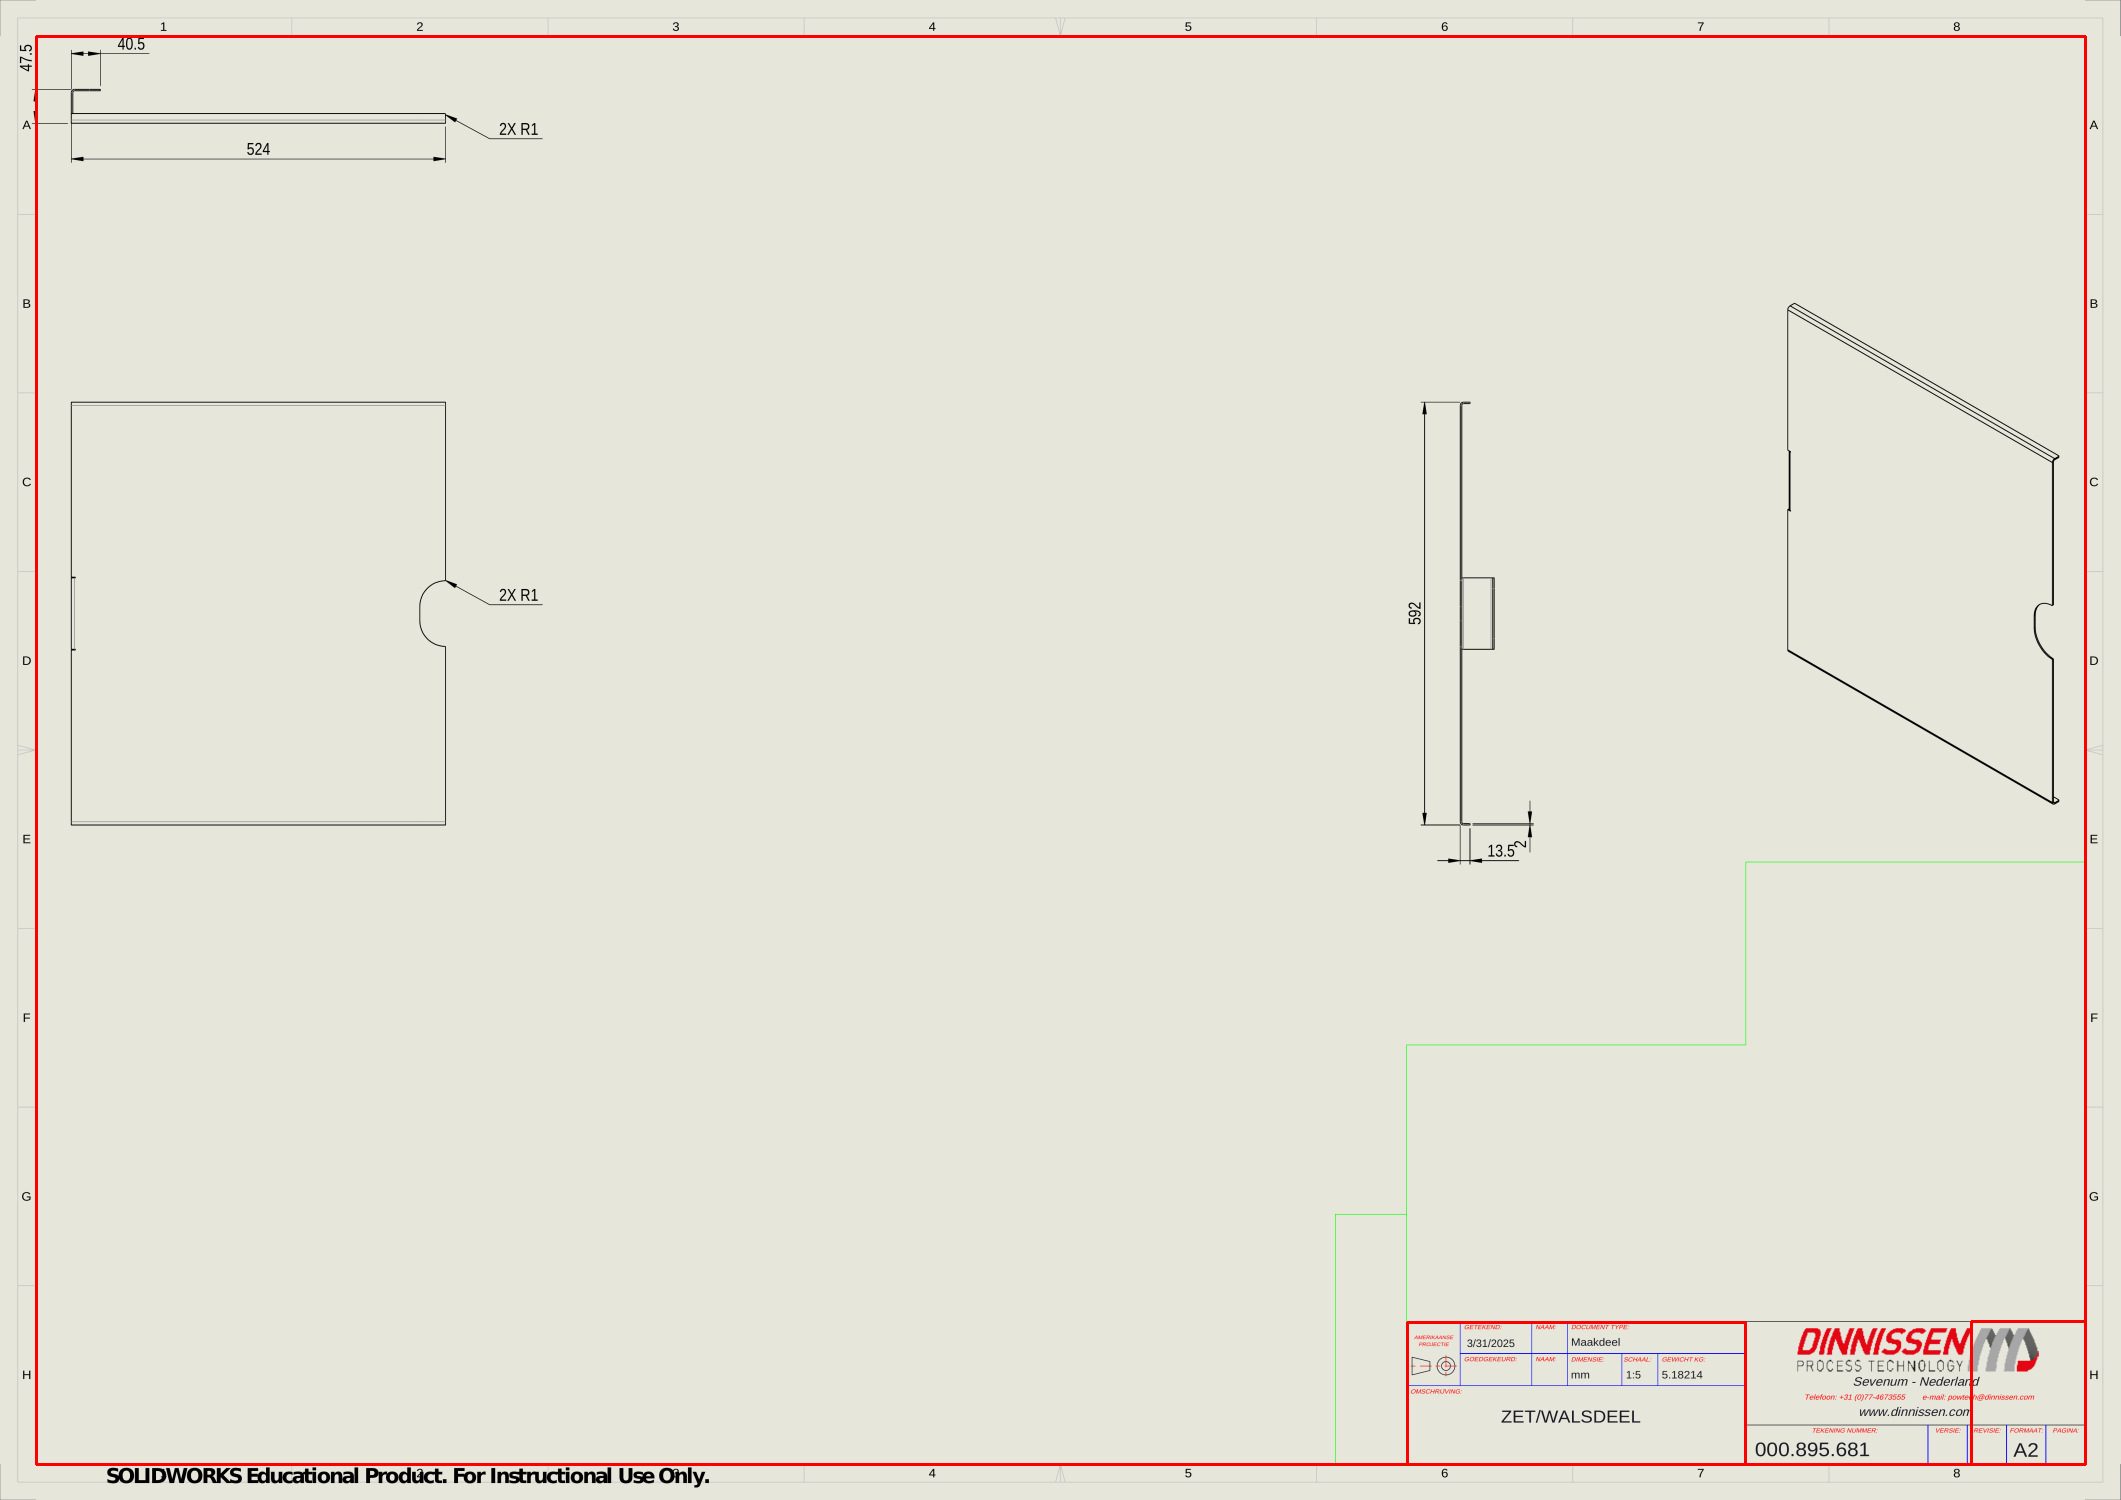

In [2]:
img_comp = img.copy()
cv2.rectangle(img_comp, boundary[0], boundary[1], color, thickness)

for i, rect in enumerate(border_lines):
    x1, y1, x2, y2 = rect
    cv2.line(img_comp, (x1, y1), (x2, y2), color, thickness)

Image.fromarray(img_comp)

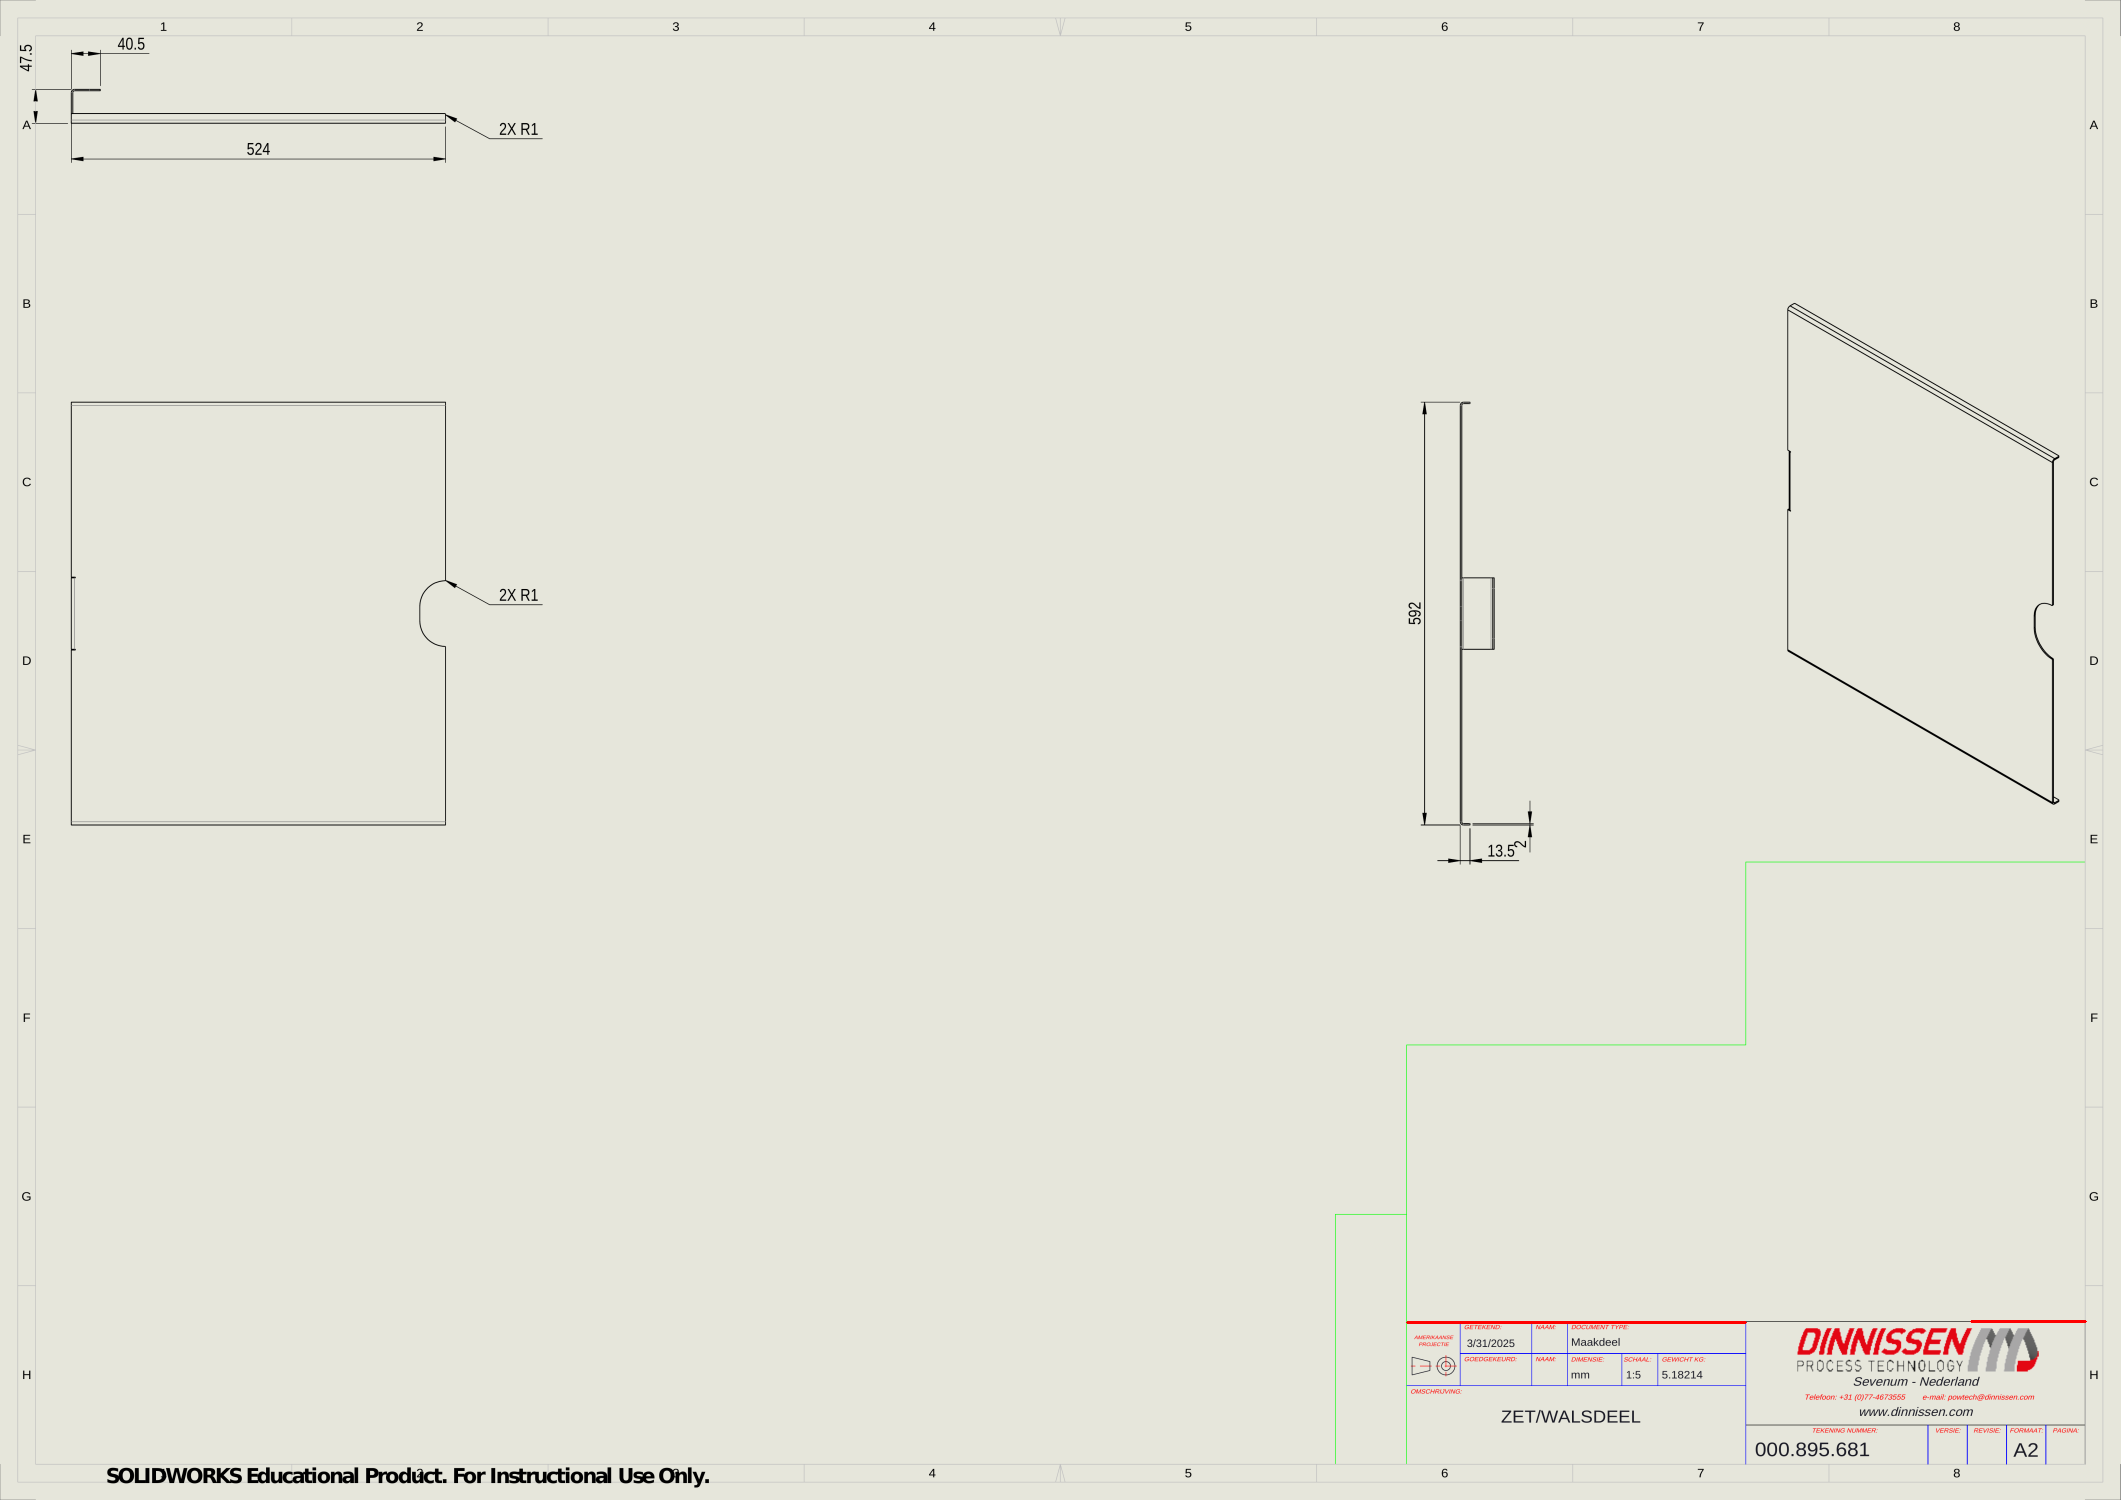

In [3]:
borders = get_border_lines(border_lines, im_h)

img_copy = img.copy()

for i, rect in enumerate(borders):
    x1, y1, x2, y2 = rect
    cv2.line(img_copy, (x1, y1), (x2, y2), color, thickness)

Image.fromarray(img_copy)

40.5
index
0    40.5
Name: value, dtype: object
40


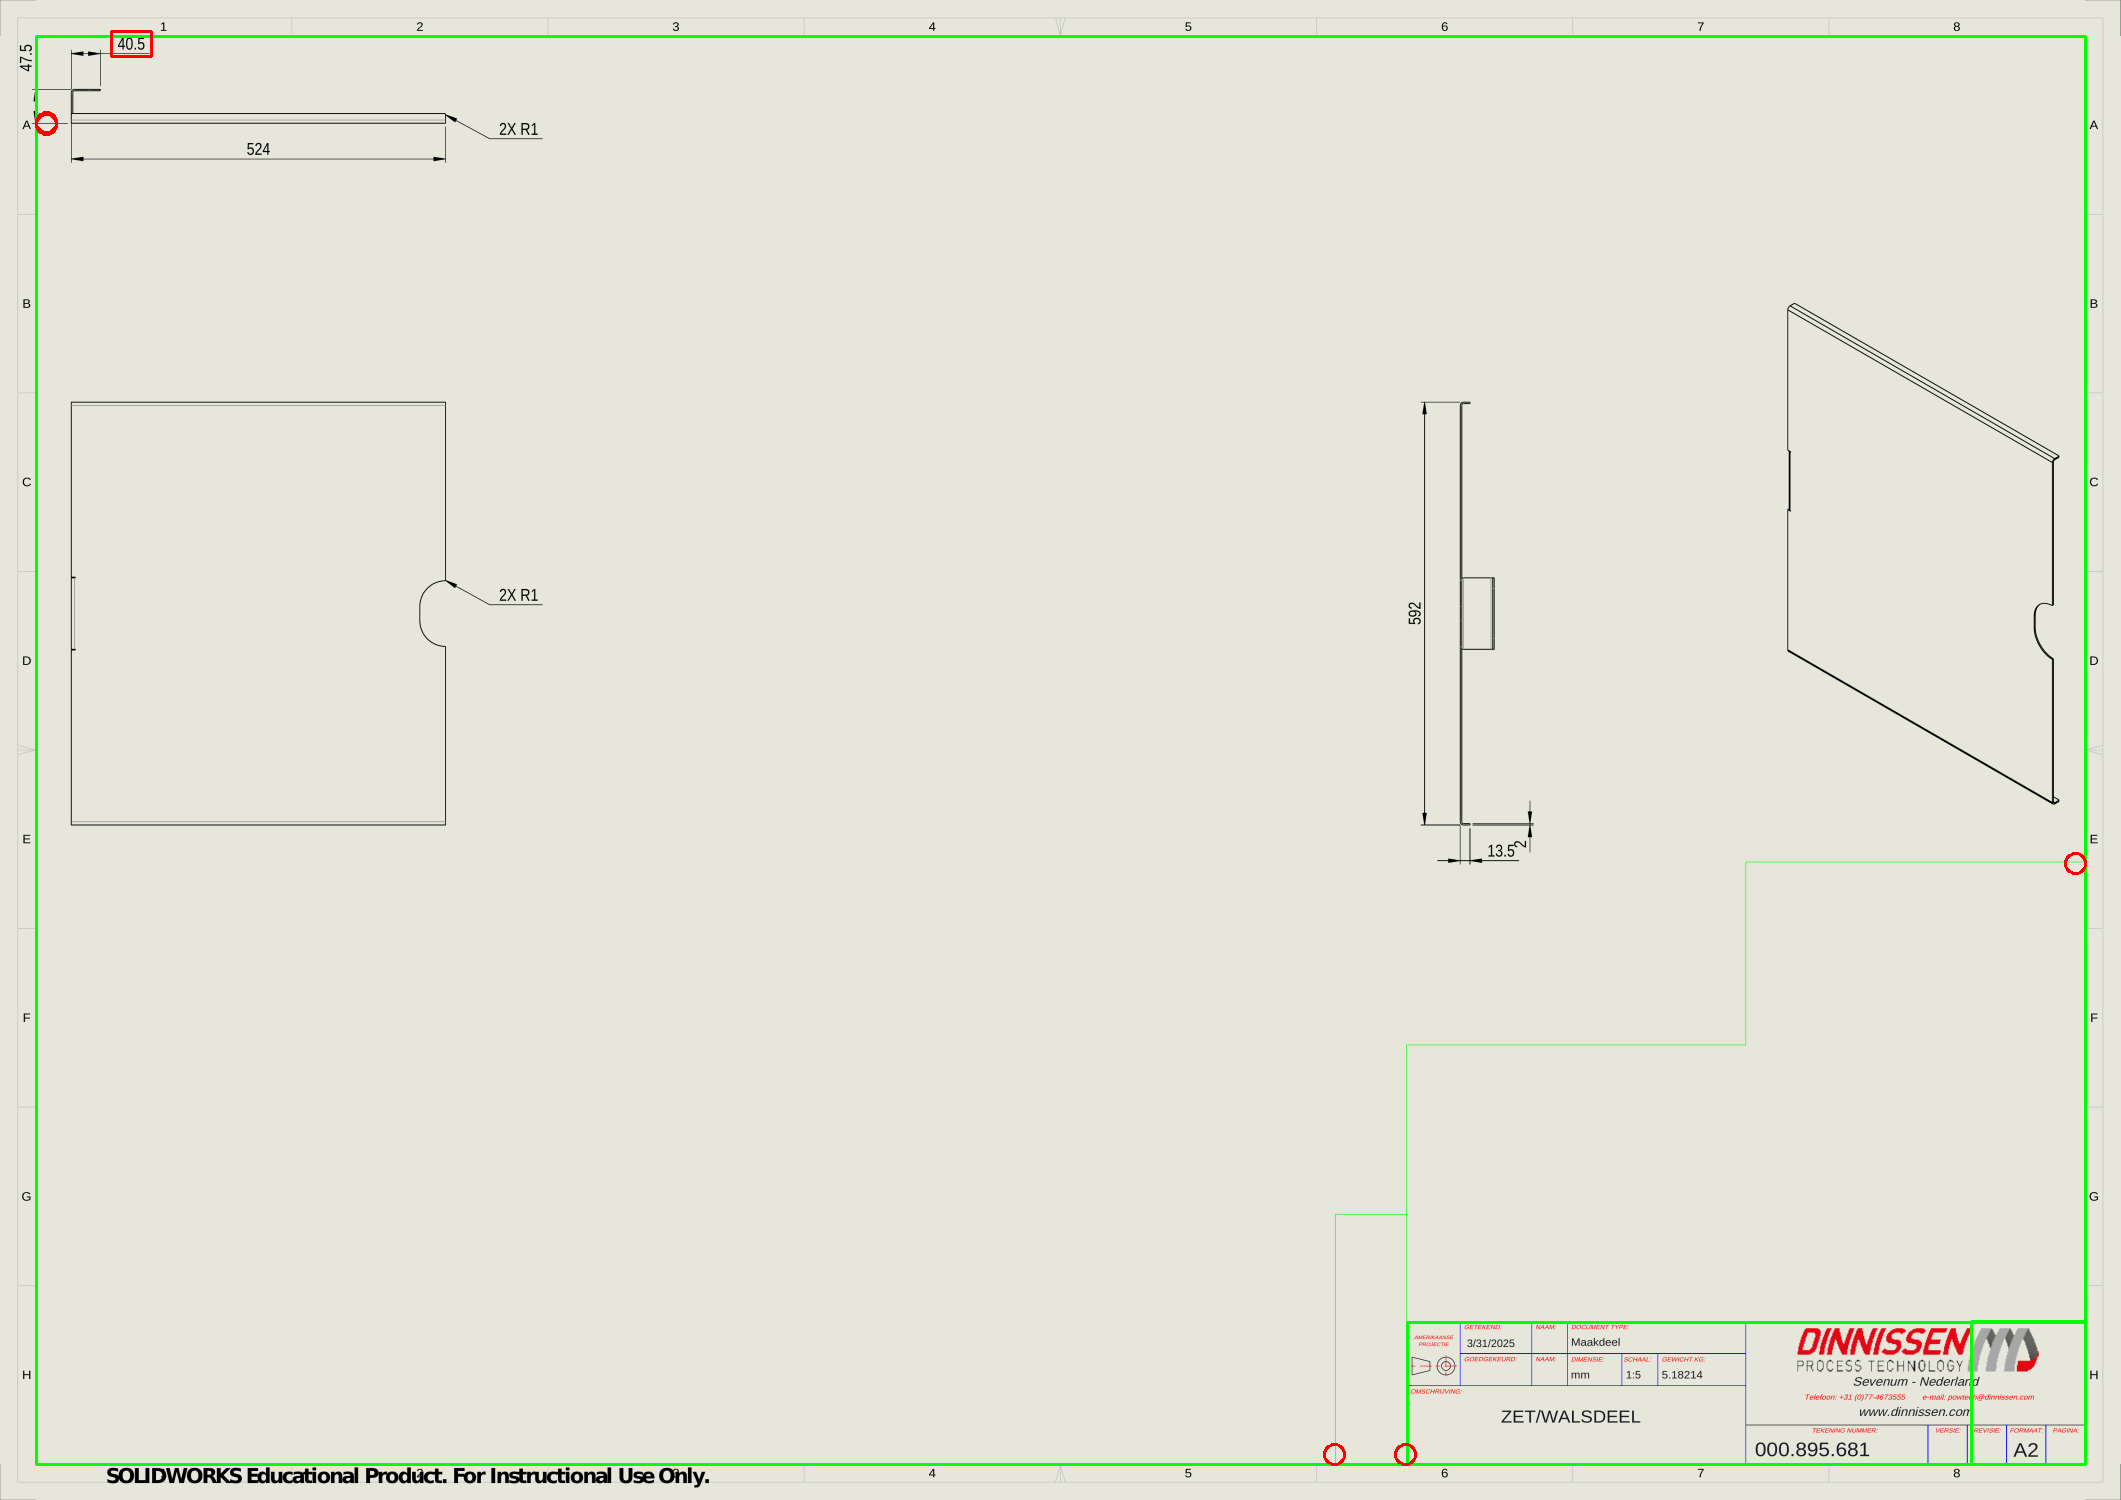

In [4]:
template_lines, intersection_lines, intersection_points, intersected_words = detect_intersection_with_template(
    img,
    boundary,
    borders,
    words,
    x_index_titles,
    y_index_titles,
    tolerance=20
)

img_comp = img.copy()

for line in template_lines:
    x1, y1, x2, y2 = line
    cv2.line(img_comp, (x1, y1), (x2, y2), (0, 255, 0), 2)

cv2.rectangle(img_comp, boundary[0], boundary[1], (0, 255, 0), 2)

for idx, row in intersected_words.iloc[:1].iterrows():
    bx1, by1, bx2, by2 = row[["x1", "y1", "x2", "y2"]].astype(int)

    print(row.value)
    print(words.loc[words.line_idx == row.line_idx]["value"])
    print(abs(bx1 - bx2))
    cv2.rectangle(img_comp, (bx1, by1), (bx2, by2), (255, 0, 0), 2)

for point in intersection_points:
    if point is not None:
        x1, y1 = point
        cv2.circle(img_comp, (int(x1), int(y1)), 10, (255, 0, 0), 2)

Image.fromarray(img_comp)